# **Задание**

## **Входные данные**

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой. Файл доступен тут - https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

## **Задачи**

1.Загрузите файл HR.csv в pandas dataframe  (5 баллов)  
2.Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).   (10 баллов)    
3.Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.   
Определите две самые скоррелированные и две наименее
скоррелированные переменные.    (10 баллов)    
4.Рассчитайте сколько сотрудников работает в каждом
департаменте.    (5 баллов)        
5.Показать распределение сотрудников по зарплатам.   (5 баллов)   
6.Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.    (5 баллов)      
7.Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.    (10 баллов)   
8.Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):    
● Доля сотрудников с повышением за последние 5 лет    
● Средняя степень удовлетворенности    
● Среднее количество проектов    
(10 баллов)      
9.Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).     
Оценить качество модели на тестовой выборке.     
(20 баллов)    
10.Загрузить jupyter notebook с решение на github и прислать ссылку. (5 баллов)   


Итого - максимум 85 баллов     
Для зачета необходимо набрать минимум 55   

# **Решение**

In [1]:
# загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# увеличим дефолтный размер графиков для лучшей визуализации
from pylab import rcParams
rcParams['figure.figsize'] = 11, 7

## **1.Загрузите файл HR.csv в pandas dataframe**

In [2]:
# загрузка файла в колаб
!gdown 1V_leHObLUlZFh0rdL7pTuKZyYCIgpWST -O HR.csv

Downloading...
From: https://drive.google.com/uc?id=1V_leHObLUlZFh0rdL7pTuKZyYCIgpWST
To: /content/HR.csv
100% 567k/567k [00:00<00:00, 50.2MB/s]


In [3]:
# загрузка данных в датафрейм
df = pd.read_csv('/content/HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
# просмотр загруженных данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## **2.Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин макс,сред.отклонение).**

Перед тем как начать расчеты, сначала надо изучить данные:     
1.Содержатетльная часть (бизнес-логика)    
2.Технические характектистики данных (объем, типы, аномалии  пр.)    
3.Оценить достаточность своей экспертизы в предметной области (все ли признаки мне понятны)  

### **2.1.Общая оценка данных датафрейма (бизнес-логика)**      

Данные представляют набор сведений о сотрудниках компании.    
По сути данные подходят под бизнес-кейс "Опрос удовлетворенности сотрудников компании" (еще называют вовлеченности, лояльности).

Исходя из бизнес-логики данные можно разделить на группы:

**Функционал работника**    
department - отдел в котором работает сотрудник  

**Удовлетворенность - основной показатель**      
satisfaction_level - Уровень удовлетворенности работой    
Last_evaluation - Время с момента последней оценки в годах   

**Сопуствующие показатели для оценки удовлетворенности:**

**Мотивация**      
salary - относительный уровень зарплаты   
promotion_last_5years - повышался ли сотрудник за последние пять лет    

**Стаж**    
time_spend_company - Стаж работы в компании в годах    
left - уволился ли сотрудник

**Производительность**
number_projects - Количество проектов, выполненных за время работы        
average_monthly_hours - Среднее количество часов на рабочем месте в месяц  

**Несчастные случаи**     
work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
    












### **2.2.Изучение данных датафрейма**

**2.2.1.Просмотр информации о данных датафрейма с помощью info()**     
Цели:    
1.Оценить объем данных (количество записей)   
2.Посмотреть на типы данных. Есть ли по ним отклонения в логике    
3.Проверить пропуски в значениях (полнота данных)

In [ ]:
# анализ данных датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**вывод "анализ данных датафрейма":**   
1.Количество строк (записей) - 14999, количество столбцов 10    
2.По типу данных признаков  - расхождений логики не установлено:

-тип данных (int64) - это целое число у признаков:
*  number_project (количество проектов)  
*  average_montly_hours (количество часов на рабочем месте)
*  time_spend_company (стаж работы в годах)
*  Work_accident (факт наличия несчатсных случаев)
*  left (факт увольнения)
*  promotion_last_5years (факт повышения сотрудника за 5 лет)

-тип данных (float64) - это число с плавающй точкой у признаков:

*   satisfaction_level (уровень удовлетворенностью работой)
*   last_evaluation (время последней оценки данных в годах)

-тип данных (object) - текстовой у признаков:

*  department (название отдела)
*  salary (уровень зарплаты)

3.Пропусков в значениях нет.

**2.2.2.Просмотр уникальных значений признаков с помощью unique()**    
Цели:   
1.Исследовать данные по содержательной части    
2.Посмотреть есть ли какие-то вопросы у меня к данным   
3.Есть ли какие-то аномалии в данных сточки зрения бизнес-логики.  

In [ ]:
# просмотр уникальных значений: 1.Уровень удовлетворенности работой
df['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [ ]:
# просмотр уникальных значений: 2.Время с момента последней оценки в годах
df['last_evaluation'].unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [ ]:
# просмотр уникальных значений: 3.Количество проектов, выполненных за время работы
df['number_project'].unique()

array([2, 5, 7, 6, 4, 3])

In [ ]:
# просмотр уникальных значений: 4.Среднее количество часов на рабочем месте в месяц
df['average_montly_hours'].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [ ]:
# просмотр уникальных значений: 5.Стаж работы в годах
df['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [ ]:
# просмотр уникальных значений: 6.Происходили ли несчастные случаи на рабочем месте с сотрудником
df['Work_accident'].unique()

array([0, 1])

In [ ]:
# просмотр уникальных значений: 7.Уволился ли сотрудник
df['left'].unique()

array([1, 0])

In [ ]:
# просмотр уникальных значений: 8.Повышался ли сотрудник за последние пять лет
df['promotion_last_5years'].unique()

array([0, 1])

In [ ]:
# просмотр уникальных значений: 9.Отдел в котором работает сотрудник
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
# просмотр уникальных значений: 10.Относительный уровень зарплаты
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

**вывод "просмотр уникальных значений":**    
1.К данным вопросов нет, все понятно.     
2.Аномалий по содержательной части не установлено.  

### **2.3.Анализ данных с позиции статистики**

Анализируем данные по типам:    
-Количественные (дискретные, непрерывные)  
-Качественные (категориальные) (порядковые, номинальные)  

Это важный шаг, знания нам потребуются для последюущего анализа данных.  

Количественные (числовые)
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах


Качественные (категориальные)
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
10. salary - относительный уровень зарплаты



### **2.4.Расчет основных статистик**

Расчет базовых статистик с помощью describe()

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**вывод по базовым статистикам:**   
**1.Выбор подхода**   
В базовые статистики вошли показатели:     
-среднеарифметическое значение      
-стандратное отклонение (мера разброса)   
-минимальное, максимальное значение    
-квантили (процентили) 25,50,75   
Данные показатели используются для оценки количественного типа данных.     
У нас имеются следующие признаки такого типа:      
satisfaction_level - Уровень удовлетворенности работой      
Last_evaluation - Время с момента последней оценки в годах     
number_projects - Количество проектов, выполненных за время работы    
average_monthly_hours - Среднее количество часов на рабочем месте в месяц    
time_spend_company - Стаж работы в компании в годах    

**2.Для наглядности лучше выделить количественные признаки в отдельный датафрейм.**  







In [ ]:
# создание отдельного датафрема с количественными признаками
num_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
df_numeric = df[num_columns]

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction_level    14999 non-null  float64
 1   last_evaluation       14999 non-null  float64
 2   number_project        14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 586.0 KB


In [ ]:
df_numeric.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


Расчитаем выбросы

In [ ]:
# расчет квантилей и межквартильного размаха
quantile_data = pd.DataFrame(df_numeric.quantile(0.25))
quantile_data[0.5] = df_numeric.quantile(0.25)
quantile_data[0.5] = df_numeric.quantile(0.5)
quantile_data[0.75] = df_numeric.quantile(0.75)
quantile_data['IQR'] = quantile_data[0.75] - quantile_data[0.25]
quantile_data

,0.25,0.5,0.75,IQR
satisfaction_level,0.44,0.64,0.82,0.38
last_evaluation,0.56,0.72,0.87,0.31
number_project,3.00,4.00,5.00,2.00
average_montly_hours,156.00,200.00,245.00,89.00
time_spend_company,3.00,3.00,4.00,1.00


In [ ]:
# расчет границ выбросов
# Lower Outlier = Q1 - 1.5*IQR
# Higher Outlier = Q3 + 1.5 * IQR

quantile_data['lower Outlier'] = quantile_data[0.25] - 1.5 * quantile_data['IQR']
quantile_data['Higher Outlier'] = quantile_data[0.75] + 1.5 * quantile_data['IQR']
quantile_data = quantile_data.T
quantile_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0.25,0.44,0.560,3.0,156.0,3.0
0.5,0.64,0.720,4.0,200.0,3.0
0.75,0.82,0.870,5.0,245.0,4.0
IQR,0.38,0.310,2.0,89.0,1.0
lower Outlier,-0.13,0.095,0.0,22.5,1.5
Higher Outlier,1.39,1.335,8.0,378.5,5.5


In [ ]:
# проверка расчета границ выбросов
q1 = df['satisfaction_level'].quantile(0.25)
q2 = df['satisfaction_level'].quantile(0.5)
q3 = df['satisfaction_level'].quantile(0.75)
IQR =q3 - q1
Lower_Outlier = q1 - 1.5*IQR
Higher_Outlier = q3 + 1.5 * IQR
print(q1)
print(q2)
print(q3)
print(IQR)
print(Lower_Outlier)
print(Higher_Outlier)

0.44
0.64
0.82
0.37999999999999995
-0.12999999999999995
1.39


Вывод: данные не содержат аномальных значений. Берем для дальнейших задач в таком виде.

## **3.Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.**

In [ ]:
# возьмем ранее сформированный датафрейм по количественным характеристикам
df_numeric.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


###**3.1.Построение матрицы - графиков**

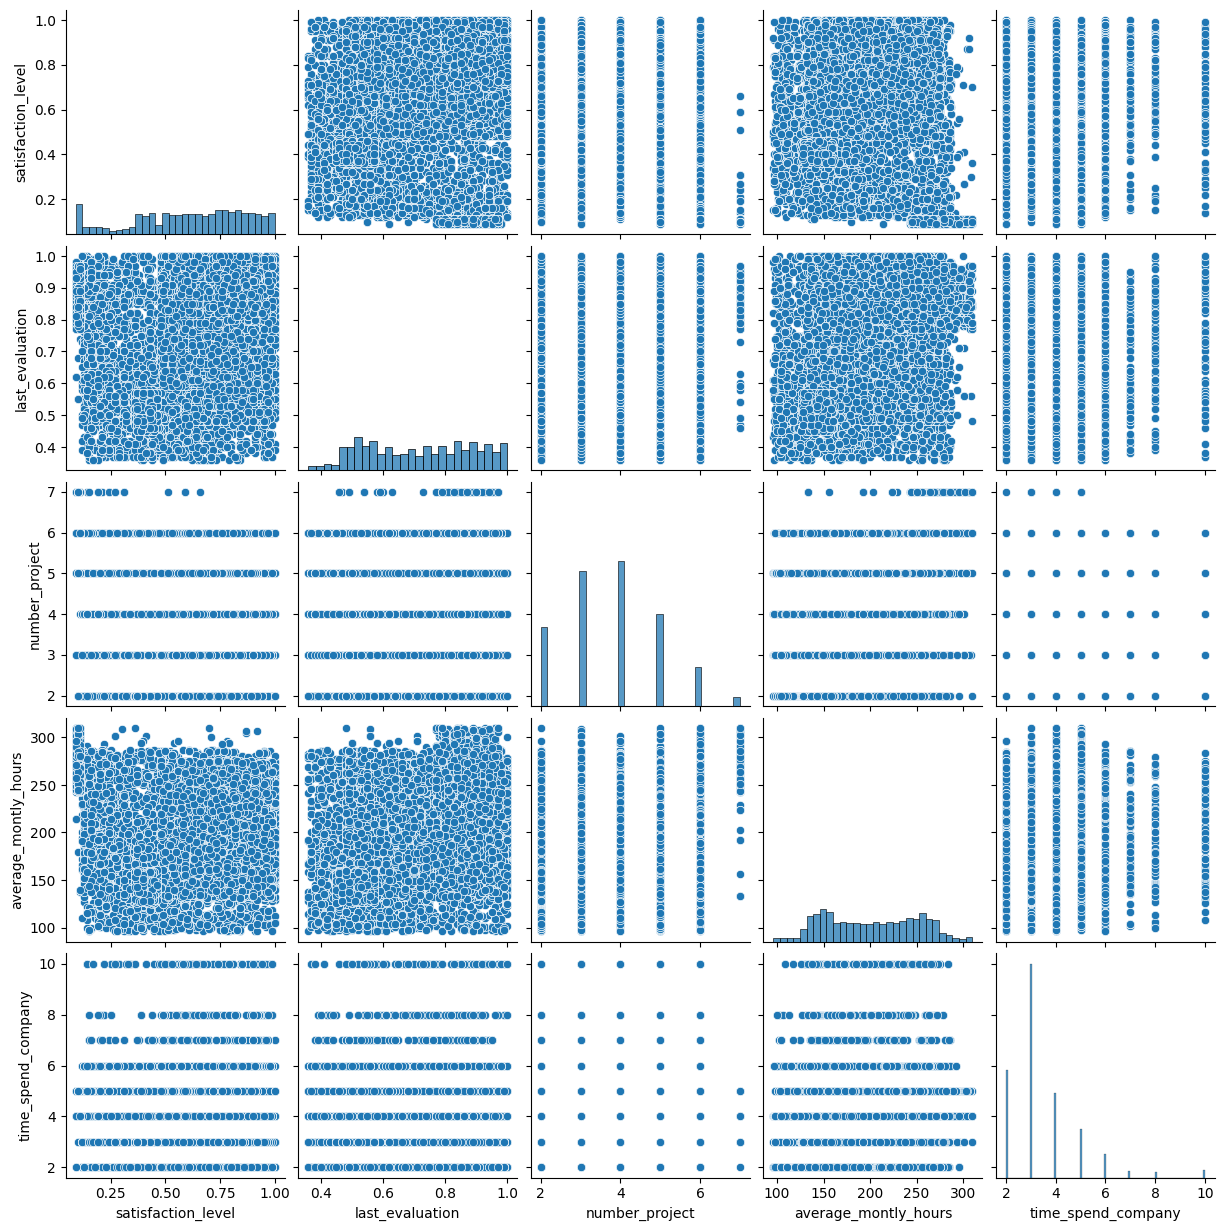

In [ ]:
# построение матрицы по датафрейму
sns.pairplot(df_numeric)

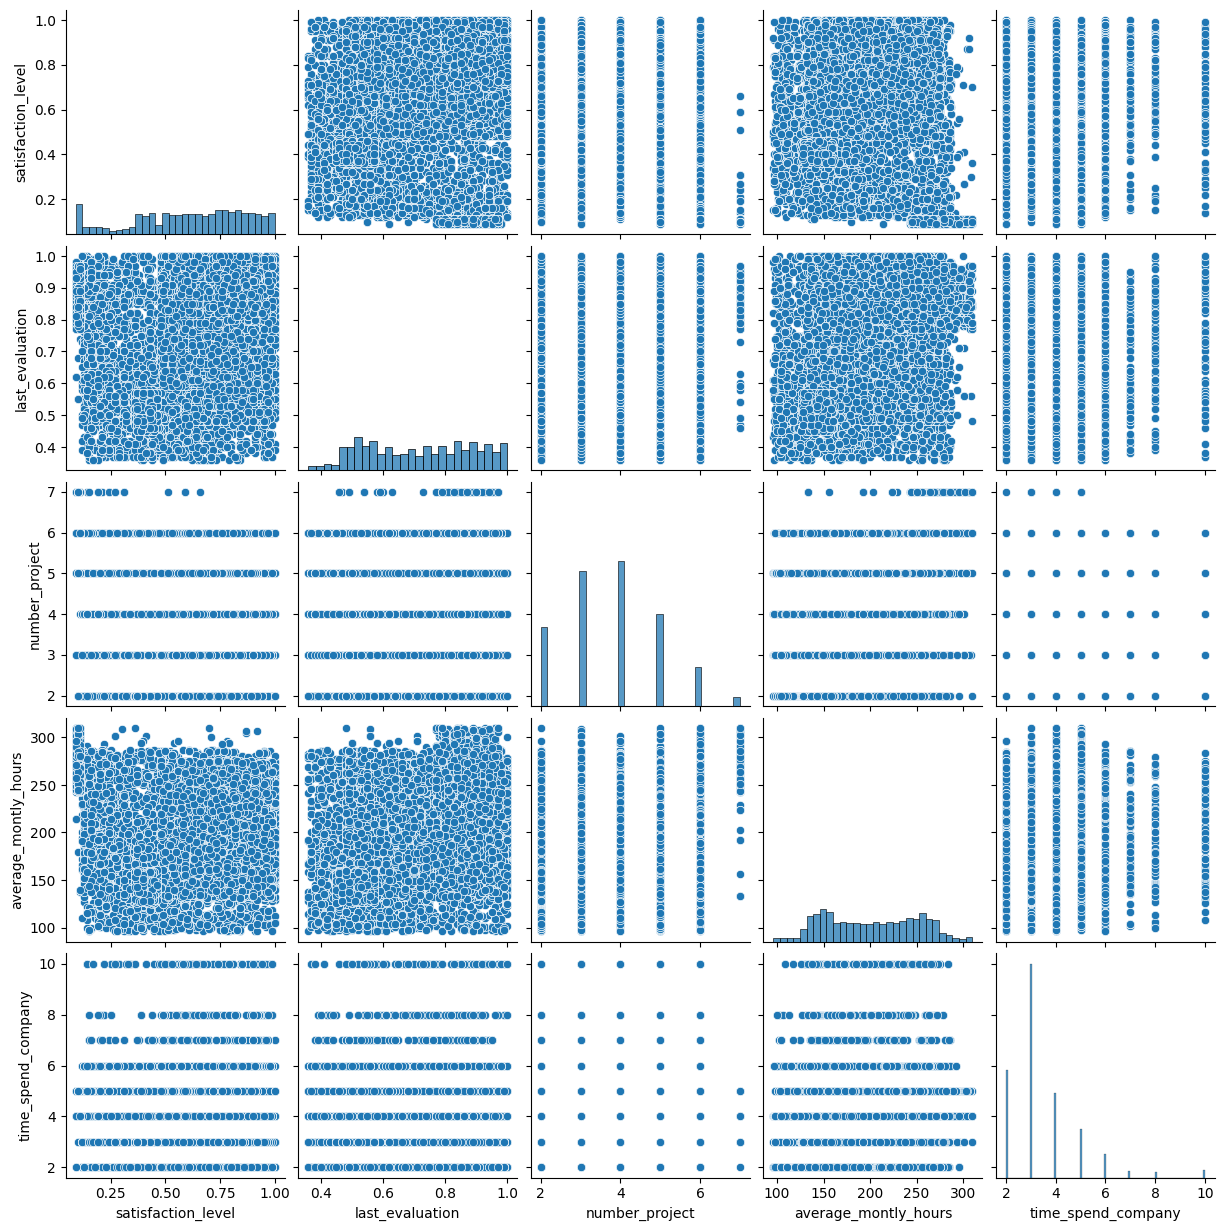

In [ ]:
# можно и так
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])

По матрице не видно ярко выраженных зависимостей между переменными (либо связи нет, либо она очень слабая).
Расчитаем коэффициенты корреляции и построим матрицу.

### **3.2.Расчет коэффициенты корреляции и построение матрицы между показателями**

Шкала оценки силы связи

coef_corr <= 0.3       - Очень слабая зависимость      
0.3 < coef_corr <= 0.5 - Слабая зависимость     
0.5 < coef_corr <= 0.7 - Средняя зависимость     
0.7 < coef_corr <= 0.9 - Высокая зависимость    
0.9 < coef_corr <= 1   - Очень высокая зависимость

In [ ]:
# расчет к-т Пирсена
display(df_numeric.corr())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


**Вывод (оценка по Пирсену):**     

**две самые скоррелированные переменные:**  
**average_montly_hours** (количество часов на работе) и **number_project** (количество проектов). К-т корреляции по модулю = 0.42. Зависимость по шкале  - слабая. По матрице это самая большая величина по модулю.   

**две наименее скоррелированные переменные:**     
**satisfaction_level** (уровень удовлетворенности) и **average_montly_hours** (количество часов на работе).  К-т корреляции по модулю = 0.02. Зависимость по шкале  - практически отстутствует. По матрице это самая меньшая величина по модулю.

In [ ]:
# расчет к-т Спирмена
display(df_numeric.corr(method = 'spearman'))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154
number_project,0.005786,0.350399,1.000000,0.397855,0.251971
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000


**Вывод (оценка по Спирмену):**     

**две самые скоррелированные переменные:**  
**average_montly_hours** (количество часов на работе) и **number_project** (количество проектов). К-т корреляции по модулю = 0.40. Зависимость по шкале  - слабая. По матрице это самая большая величина по модулю.   

**две наименее скоррелированные переменные:**     
**satisfaction_level** (уровень удовлетворенности) и **number_project** (количество проектов).  К-т корреляции по модулю = 0.006. Зависимость по шкале  - практически отстутствует. По матрице это самая меньшая величина по модулю.

In [ ]:
# расчет к-т Кендалла
display(df_numeric.corr(method = 'kendall'))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842
number_project,0.022077,0.266267,1.000000,0.306987,0.195025
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000


**Вывод (оценка по Кенддаллу):**     

**две самые скоррелированные переменные:**  
**average_montly_hours** (количество часов на работе) и **number_project** (количество проектов). К-т корреляции по модулю = 0.31. Зависимость по шкале  - слабая. По матрице это самая большая величина по модулю.   

**две наименее скоррелированные переменные:**     
**satisfaction_level** (уровень удовлетворенности) и **number_project** (количество проектов).  К-т корреляции по модулю = 0.02. Зависимость по шкале  - практически отстутствует. По матрице это самая меньшая величина по модулю.

**Общий вывод:**    

**Две самые скоррелированные переменные** это  **average_montly_hours** (количество часов на работе) и **number_project** (количество проектов). По всем трем матрицам к-т корреляции самый высокий по этим двум показателям из всех других пар.     

**Две наименнее скоррелированные переменные** это **satisfaction_level** (уровень удовлетворенности) и **number_project** (количество проектов). На двух из трех матриц к-т корреляции самый низкий по этим двум показателям из всех других пар.



## **4.Рассчитайте сколько сотрудников работает в каждом департаменте.**

In [ ]:
#если требуется только расчет, то можно использовать подход распределения количества строк по значениям столбца
df['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

### **Построение визуализации: Распределение сотрудников по департаментам**

1.Подготовка данных

In [158]:
# для удобства расчетов в датафрейм добавим столбец id (пусть это будет id сотрудника)
# id сотрудника будет индекс строки датафрейма
# такой вариант подходит, т.к. в датафрейме нет пропусков.
# производить расчеты по количеству сотрудников будем по столбцу id
df['id'] = df.index

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  id                     14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [ ]:
# создание отдельного датафрейма: группировка по департаментам с подсчетом количества по столбцу id
department = df.groupby('department').agg({'id': 'count'})
department = department.rename(columns={'id': 'count_person'})
department


,count_person
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


2.Выбор типа визуализации     

Для визуализации данных по заданию подойдет столбчатая диаграмма     

Методы plot.bar() и plot.barh() строят вертикальные и горизонтальные столбчатые диаграммы.

3.Построение визуализации

<Axes: title={'center': 'Распределение сотрудников по департаментам'}, xlabel='Департаменты', ylabel='Количество сотрудников'>

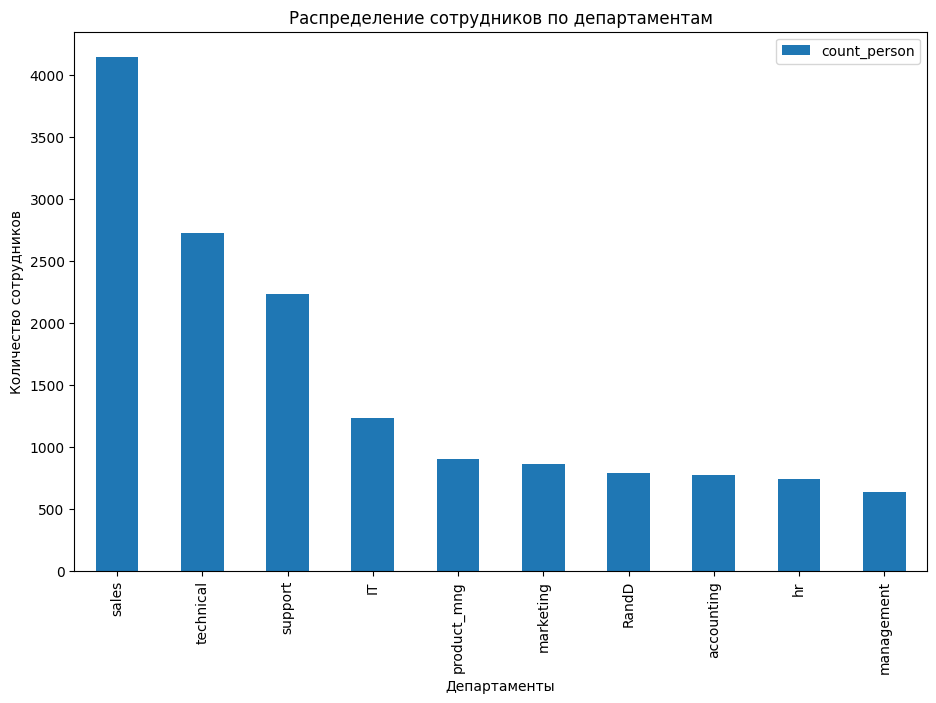

In [ ]:
# построение вертикальной диаграммы
department.sort_values(by='count_person', ascending=False).plot(kind='bar',
                                                                  title='Распределение сотрудников по департаментам',
                                                                  xlabel='Департаменты',
                                                                  ylabel='Количество сотрудников')

<Axes: title={'center': 'Распределение сотрудников по департаментам'}, xlabel='Количество сотрудников', ylabel='Департаменты'>

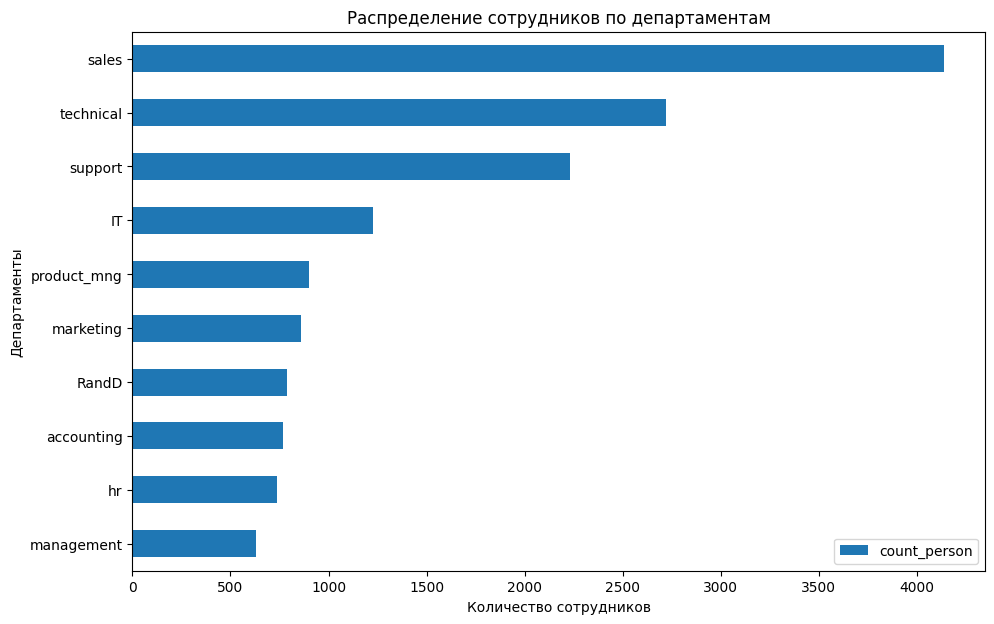

In [ ]:
# построение горизонтальной диаграммы (более удобная визуализация)
department.sort_values(by='count_person', ascending=True).plot(kind='barh',
                                                                  title='Распределение сотрудников по департаментам',
                                                                  xlabel='Количество сотрудников',
                                                                  ylabel='Департаменты')

4.Выводы    

Больше всего сотрудников работает (ТОП-3):    
-sales (1 место)    
-technical (2 место)    
-support (3 место)    

Меньше всего сотрудников работает (ТОП-3):    
-managment (1 место)    
-hr (2 место)    
-accounting (3 место)    



## **5.Показать распределение сотрудников по зарплатам.**

1.Подготовка данных

In [ ]:
# создание отдельного датафрейма: группировка по уровню дохода с подсчетом количества по столбцу id
salary = df.groupby('salary').agg({'id': 'count'})
salary = salary.rename(columns={'id': 'count_person'})
salary

,count_person
salary,
high,1237
low,7316
medium,6446


2.Выбор типа визуализации

Для визуализации данных по заданию подойдет столбчатая диаграмма

Методы plot.bar() и plot.barh() строят вертикальные и горизонтальные столбчатые диаграммы.

3.Построение визуализации

In [ ]:
# построение горизонтальной диаграммы (более удобная визуализация)
salary.sort_values(by='count_person', ascending=True).plot(kind='barh',
                                                                  title='Распределение сотрудников по уровню дохода',
                                                                  xlabel='Количество сотрудников',
                                                                  ylabel='Уровень дохода')

4.Выводы    

Большинство сотрудников имеют низникй уровень дохода.

## **6.Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.**

1.Подготовка данных

In [ ]:
# создание отдельного датафрейма: группировка по депаратментам и уровню дохода с подсчетом количества по столбцу id
salary_department = df.groupby(['department', 'salary']).agg({'id': 'count'})
salary_department = salary_department.rename(columns={'id': 'count_person'})
salary_department

count_person
department  salary              
IT          high              83
            low              609
            medium           535
RandD       high              51
            low              364
            medium           372
accounting  high              74
            low              358
            medium           335
hr          high              45
            low              335
            medium           359
management  high             225
            low              180
            medium           225
marketing   high              80
            low              402
            medium           376
product_mng high              68
            low              451
            medium           383
sales       high             269
            low             2099
            medium          1772
support     high             141
            low             1146
            medium           942
technical   high             201
            low             1372
            medium          1147

2.Выбор типа визуализации

Многорядная столбчатая диаграмма


3.Построение визуализации

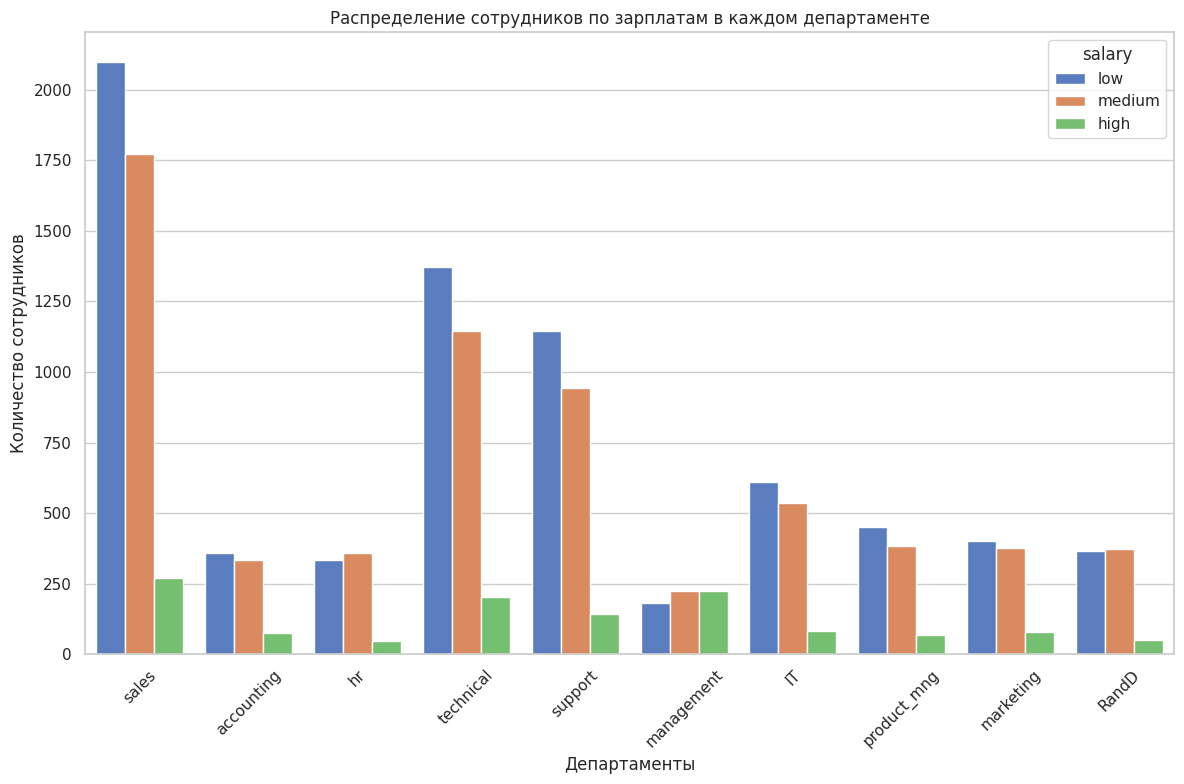

In [ ]:
# построение графика с помощью seaborn.countplot.
# Установка стиля для графиков
sns.set(style="whitegrid")

# Создание фигуры и осей
fig, ax = plt.subplots(figsize=(12, 8))

# Построение распределения зарплат по департаментам
sns.countplot(x='department', hue='salary', data=df, palette='muted', ax=ax)

# Установка подписей и заголовка
ax.set_title('Распределение сотрудников по зарплатам в каждом департаменте')
ax.set_xlabel('Департаменты')
ax.set_ylabel('Количество сотрудников')

# Поворот подписей по оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Распределение оценок'}, ylabel='Frequency'>

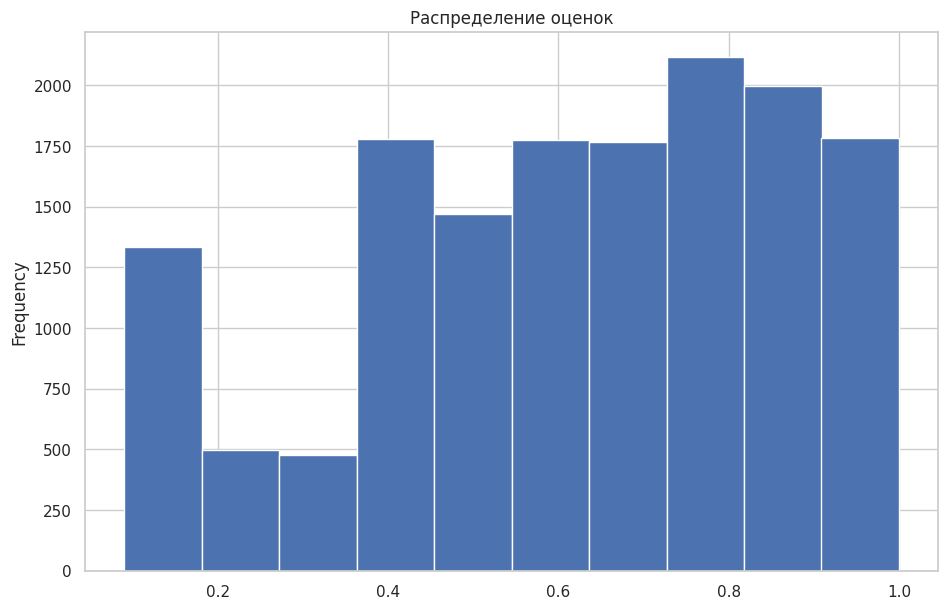

In [ ]:
# распредедение оценок удовлетворенности (гистограмма)
df['satisfaction_level'].plot(kind='hist',  title='Распределение оценок')

<Axes: title={'center': 'Распределение оценок пользователей'}>

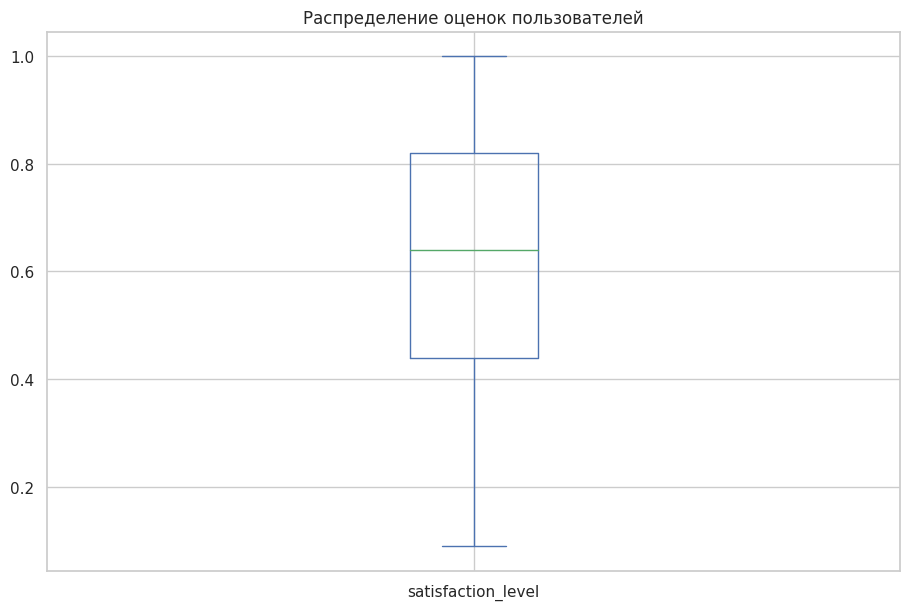

In [ ]:
# ящик с усами
df['satisfaction_level'].plot(kind='box',
                   title='Распределение оценок пользователей', grid=True)

<Axes: title={'center': 'Стаж и проекты'}>

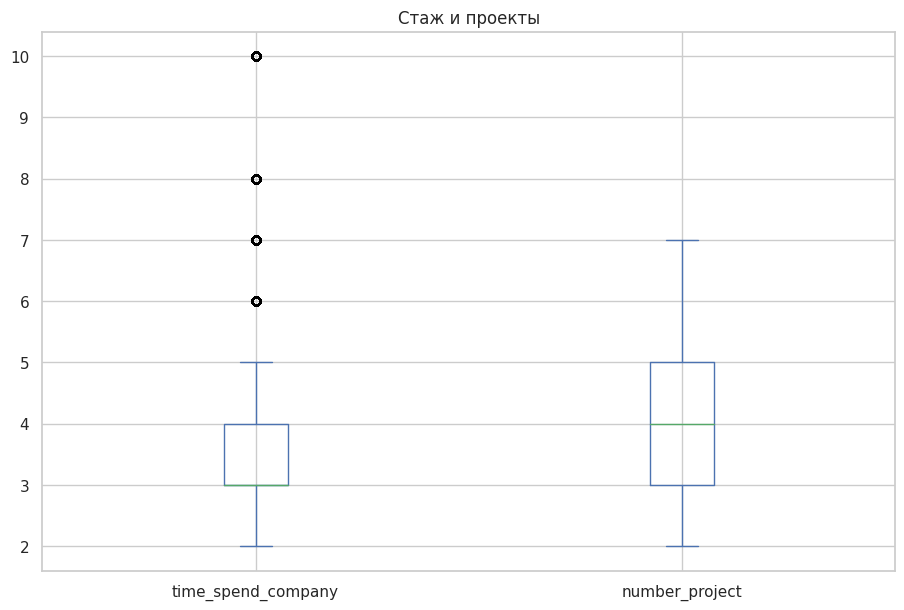

In [ ]:
df[['time_spend_company', 'number_project']].plot(kind='box',
                   title='Стаж и проекты', grid=True)

## **7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.**

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [180]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,id
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,3
4,0.37,0.52,2,159,3,0,1,0,sales,low,4


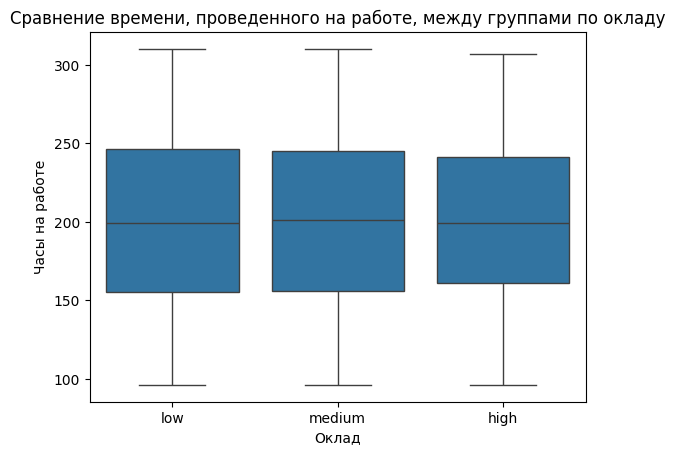

In [181]:
# Построение графика для визуализации данных
sns.boxplot(x='salary', y='average_montly_hours', data=df)
plt.title('Сравнение времени, проведенного на работе, между группами по окладу')
plt.xlabel('Оклад')
plt.ylabel('Часы на работе')
plt.show()

In [182]:
# Разделение данных на группы по окладу
low_salary = df[df['salary'] == 'low']['average_montly_hours']
high_salary = df[df['salary'] == 'high']['average_montly_hours']

In [183]:
# Проведение t-теста для проверки гипотезы
t_stat, p_value = ttest_ind(low_salary, high_salary, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.7624331665385475, P-value: 0.4459045542257889


Вывод: гипотеза не подтвердилась, что сотрудники с высоким окладом работаю больше.

## **8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**

● Доля сотрудников с повышением за последние 5 лет     
● Средняя степень удовлетворенности    
● Среднее количество проектов    

### **Доля сотрудников с повышением за последние 5 лет**

In [ ]:
# общее количество сотрудников
# напомню, что столбец id мы добавили для удобства расчетов
count_person = df['id'].count()
count_person

14999

In [ ]:
# датасет с повышением
df_prom = df[df['promotion_last_5years'] == 1]
df_prom

In [ ]:
# количество у кого было повышение (319 чел)
count_prom = df_prom['id'].count()
count_prom

319

In [ ]:
# датасет с повышением (уволившиеся)
df_prom_left = df_prom[df_prom['left'] == 1]
df_prom_left

In [ ]:
# количество уволившихся у кого было повышение (19 чел)
count_prom_left = df_prom_left['id'].count()
count_prom_left

19

In [ ]:
# датасет с повышением (не уволившиеся)
df_prom_left_no = df_prom[df_prom['left'] == 0]
df_prom_left_no

In [ ]:
# количество не уволившихся у кого было повышение (300 чел)
count_prom_left_no = df_prom_left_no['id'].count()
count_prom_left_no

300

In [ ]:
# расчитываем долю уволившихся сотрудников с повышением (от общего количества сотрудников с повышением)
share_prom_left = count_prom_left / count_prom
share_prom_left

0.05956112852664577

In [ ]:
# расчитываем долю не уволившихся сотрудников с повышением (от общего количества сотрудников с повышением)
share_prom_left_no = count_prom_left_no / count_prom
share_prom_left_no

0.9404388714733543

In [ ]:
# расчитываем долю уволившихся сотрудников с повышением (от общего количества сотрудников)
share_prom_left_ = count_prom_left / count_person
share_prom_left_

0.0012667511167411161

In [ ]:
# расчитываем долю не уволившихся сотрудников с повышением (от общего количества сотрудников)
share_prom_left_no_ = count_prom_left_no / count_person
share_prom_left_no_

0.020001333422228148

### **Средняя степень удовлетворенности**

In [ ]:
# датасет уволившихся
df_left = df[df['left'] == 1]
# датасет не уволившихся
df_left_no = df[df['left'] == 0]

In [ ]:
# средняя степень удовлетворенности уволившихся
df_left['satisfaction_level'].mean()

0.4400980117614114

In [ ]:
# можно посмотреть общие статистики по уровню удовлетворенности уволившихся сотрудников
df_left['satisfaction_level'].describe()

count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64

In [ ]:
# средняя степень не удовлетворенности уволившихся сотрудников
df_left_no['satisfaction_level'].mean()

0.666809590479524

In [ ]:
# можно посмотреть общие статистики по уровню удовлетворенности не уволившихся сотрудников
df_left_no['satisfaction_level'].describe()

count    11428.000000
mean         0.666810
std          0.217104
min          0.120000
25%          0.540000
50%          0.690000
75%          0.840000
max          1.000000
Name: satisfaction_level, dtype: float64

### **Среднее количество проектов**

In [ ]:
# среднее количество проектов у уволившихся сотрудников
round(df_left['number_project'].mean(), 0)

4.0

In [ ]:
# можно посмотреть общие статистики по количеству проектов у уволившихся сотрудников
df_left['number_project'].describe()

count    3571.000000
mean        3.855503
std         1.818165
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: number_project, dtype: float64

In [ ]:
# среднее количество проектов у не уволившихся
round(df_left_no['number_project'].mean(), 0)

4.0

In [ ]:
# можно посмотреть общие статистики по количеству проектов у не уволившихся сотрудников
df_left_no['number_project'].describe()

count    11428.000000
mean         3.786664
std          0.979884
min          2.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: number_project, dtype: float64

## **9.Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).Оценить качество модели на тестовой выборке.**

In [133]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik -q
import phik
from phik.report import plot_correlation_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

### **LDA**

1.Подготовка данных

In [ ]:
df.head()

In [134]:
data = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years','left']]

In [ ]:
data

In [136]:
data_class = df['left']

In [ ]:
data_class

2.Разделение выборки на тренировочную и тестовую

In [138]:
# разделаяем выборку на тренировочную и тестовую в соотношении 25 на 75
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size = 0.25)

In [139]:
# количество записей для теста
len(y_test)

3750

In [140]:
# количество записей для обучения
len(y_train)

11249

3.Обучение

In [141]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [142]:
# инициализация класса
lda = LinearDiscriminantAnalysis()

In [143]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [153]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

4.Оценка качества модели

In [ ]:
# смотрим разницу факта и прогноза
res = pd.DataFrame([y_test, lda.predict(X_test)]).T
res

In [149]:
# загрузка функции точности
from sklearn.metrics import accuracy_score

In [150]:
# расчет точности модели
accuracy_score(y_test, lda.predict(X_test))

0.7530666666666667

Вывод:  Точность модели - 75%. Результат средний, это озанчает, что в 25% случаев мы ошибемся.

Если решать задачу с точки зрения бизнеса, то нужно определить насколько критично такой уровень ошибок и для какой задачи строится модель.

Если бизнес-заказчик скажет, что такой результат не устраивает, то вижу такие
варианты решений:     
1.В рамках модели LDA попробовать поэкспериментировать с признаками (убрать/ добавить) Т.к. в модели очень слабая связь между признаками (вывод из других задач итоговго задания)      
2.Попробовать другие способы построения модели




Доп часть к решению задачи: попробовала использовать знания, которые давались на вебинаре по базовым алгоритмам ML

### **EDA**

**Описательные статистики**

Посмотрим, сколько людей отобщего количества уволилось

In [ ]:
 df['left'].value_counts(normalize=True)

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [ ]:
# общее количество сотрудников
# напомню, что столбец id мы добавили для удобства расчетов
count_person = df['id'].count()
count_person

14999

In [ ]:
# датасет уволившихся
df_left = df[df['left'] == 1]
# датасет не уволившихся
df_left_no = df[df['left'] == 0]

In [ ]:
# количество уволившихся сотрудников
count_person_left = df_left['id'].count()
print(count_person_left)
print(count_person_left / count_person)


3571
0.2380825388359224


24% уволившихся от общего количества сотрудников

Несбалансированный набор данных (unbalanced dataset) — это выборка, в которой количества объектов каждого из классов значительно отличаются.

Очевидно, что такая проблема в первую очередь актуальна для задач классификации.

Что считается дисбалансом? Ответ может варьироваться от умеренного до экстремального, как показано в таблице ниже.

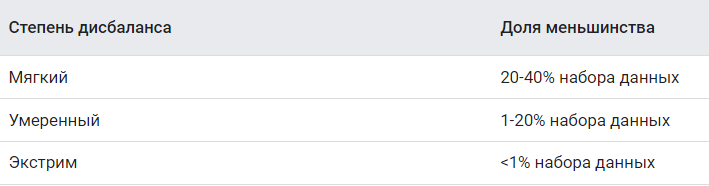

Мягкая степень дисбаланса, считаем данные сбалансированные

In [ ]:
# исключили department и salary
df_ml = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']]

In [ ]:
df_ml.info()

interval columns not set, guessing: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


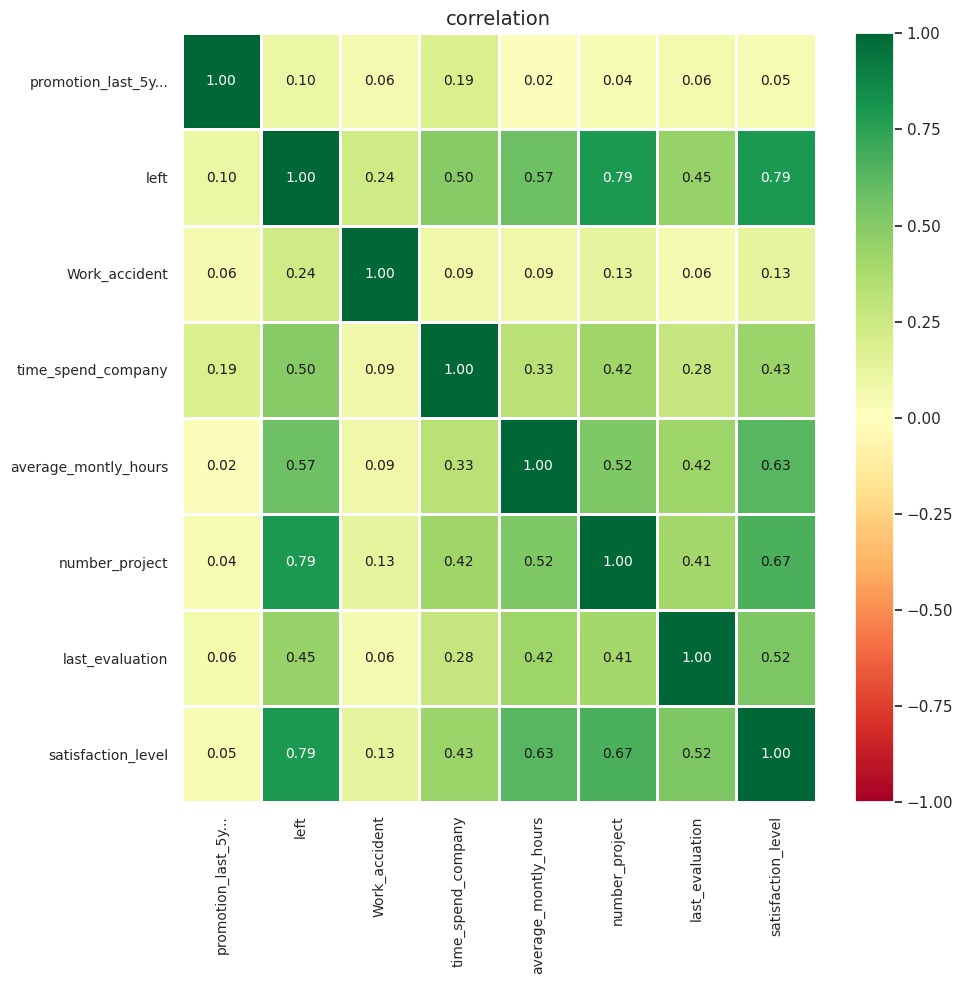

In [ ]:
# Построим матрицу корреляций признаков и отобразим ее в виде тепловой карты.
phik_matrix = df_ml.phik_matrix()
plot_correlation_matrix(phik_matrix.values, x_labels=phik_matrix.columns, y_labels=phik_matrix.index, figsize=(10, 10))

Выбрать пары с высоким коэф корреляции:
Можно увидеть умеренную взаимосвязь между показателем увольнения и признаками:
-уровень удовлетворенности (satisfaction_level) (0.79)  
-количество проектов (number_project)   (0.79)


0.7 < coef_corr <= 0.9 - Высокая зависимость

**Оценка средних значений признаков по группам уволившихся и не уволившихся**

Посмотрим на средние значения признаков в двух группах — тех, кто уволился и тех, кто не уволился.

In [ ]:
df_ml.groupby('left').agg('mean').round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


У уволившихся: заметна разница по уровню удовлетворенности, количество проектов, количество рабочих часов, повышения

**Распределения признаков по уволившимся и не уволившихся**

Поделим признаки на категориальные и числовые.

In [ ]:
categorical_list = [col for col in df_ml.drop(['left'], axis=1).columns if df[col].nunique() <= 10]
non_categorical_list = [col for col in df_ml.drop(['left'], axis=1).columns if df[col].nunique() > 10]

print(categorical_list)
print(non_categorical_list)

['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
['satisfaction_level', 'last_evaluation', 'average_montly_hours']


Построим столбчатые диаграммы для каждого категориального признака в разбивке по признаку увольнения.

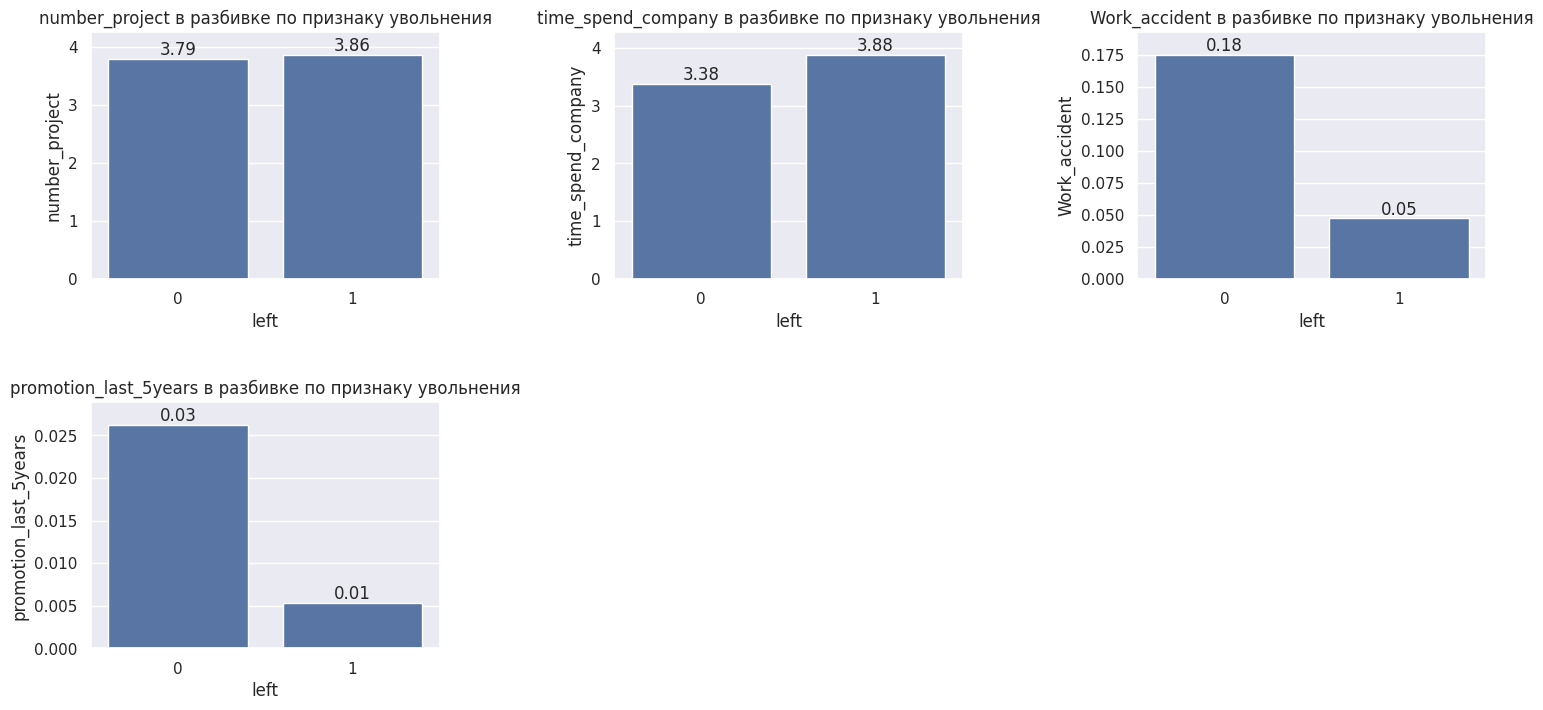

In [ ]:
# Определяем количество строк и столбцов в сетке
num_plots = len(categorical_list)
rows = math.ceil(num_plots / 3)  # Количество строк
cols = min(num_plots, 3)  # Количество столбцов

# Создаем сетку осей
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*6, rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_list):
    ax = sns.barplot(data=df_ml, x='left', y=col, ax=axes[i], errorbar=None)
    ax.set_title(f'{col} в разбивке по признаку увольнения')
    bar_labels = [f"{value:.2f}" for value in ax.containers[0].datavalues]
    ax.bar_label(ax.containers[0], labels=bar_labels)
    # Настраиваем границы графика по оси y
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1] * 1.05)  # Увеличиваем верхнюю границу на 5 %

# Убираем лишние пустые оси
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Настраиваем отступы между графиками
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

Распределения категориальных признаков в виде столбчатых диаграмм хорошо иллюстрируют все то, что мы уже смогли увидеть и описать выше по таблице средних значений признаков.

Теперь построим диаграммы "ящик с усами" для каждого числового признака в разбивке по признаку увольнени.

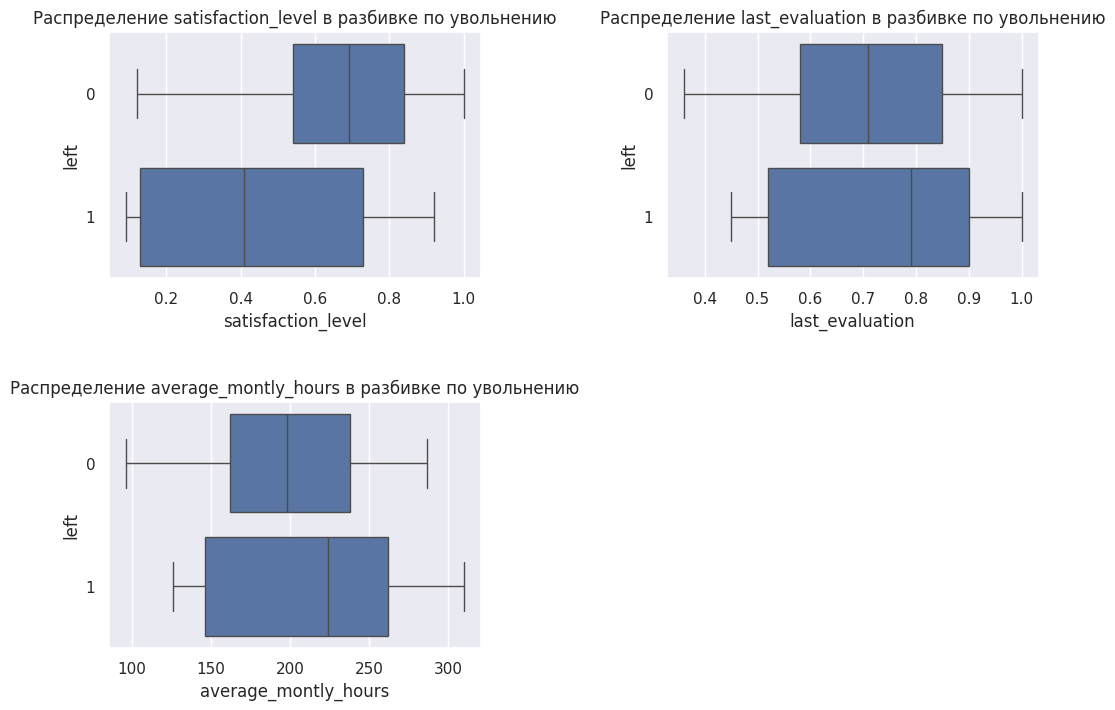

In [ ]:
num_plots = len(non_categorical_list)
rows = math.ceil(num_plots / 2)
cols = min(num_plots, 2)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(non_categorical_list):
    ax = sns.boxplot(data=df, orient='h', x=col, y='left', ax=axes[i])
    ax.set_title(f'Распределение {col} в разбивке по увольнению')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

У уволившихся уровень удовлетворенности низкий, у них давно интерсовались их оценкой и они больше работали

### **Построение модели прогнозирования увольнения сотрудников**

**Разделение и стандартизация выборок**

Построим модель бинарной классификации пользователей, где целевой признак — факт увольнения в следующем месяце.

Для того чтобы снизить влияние дисбаланса классов при разбиении выборки, в наборе данных используется специальный тип разбиения, который называется стратифицированным (stratified). Данное разбиение предполагает, что наблюдения, принадлежащие каждому из классов, гарантированно попадут в каждый из наборов данных в одинаковой пропорции.

In [ ]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
from sklearn.model_selection import train_test_split

X = df_ml.drop('left', axis = 1)
y = df_ml['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Строим модель**

Используем алгоритм логистической регрессии, обучим модель на обучающей выборке, сделаем прогноз на тестовой выборке и посчитаем метрики.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)

# обучим модель лог.регрессии
lr_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2857
           1       0.51      0.25      0.34       893

    accuracy                           0.76      3750
   macro avg       0.65      0.59      0.60      3750
weighted avg       0.73      0.76      0.73      3750



Метрика `accuracy` является одной из метрик алгоритмов бинарной классификации и означает долю верно угаданных ответов из всех прогнозов. Чем ближе значение `accuracy` к 100%, тем лучше. В нашем случае она составляет 0.76 для алгоритма логистической регрессии. Однако, данная метрика хорошо работает только в случае, если классы сбалансированы, то есть когда объектов каждого класса примерно поровну, 50% : 50%. Но мы ранее посчитали, что в нашей задаче классы имеют соотношение 24% : 76%, то есть баланс классов не соблюден. Так как классы не сбалансированны, то эта метрика скорей показывает не то, на сколько хорошо модель предсказывает положительные исходы (единицы, или отток в нашем случае), а то, насколько хорошо она определяет превалирующий класс.

Метрика `precision` говорит, какая доля прогнозов относительно "1" класса верна. То есть смотрим долю правильных ответов только среди целевого класса (класс "увольнения").  В бизнесе метрика precision нужна, если каждое срабатывание  модели ( факт отнесения к классу "1" стоит ресурсов, а бизнес не хочет, чтобы модель часто «срабатывала попусту». `Precision` составляет 0.51.

Метрика `recall` нацелена на минимизацию противоположных рисков:  показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели. Она составляет  0.25.



Text(112.49999999999999, 0.5, 'Факт')

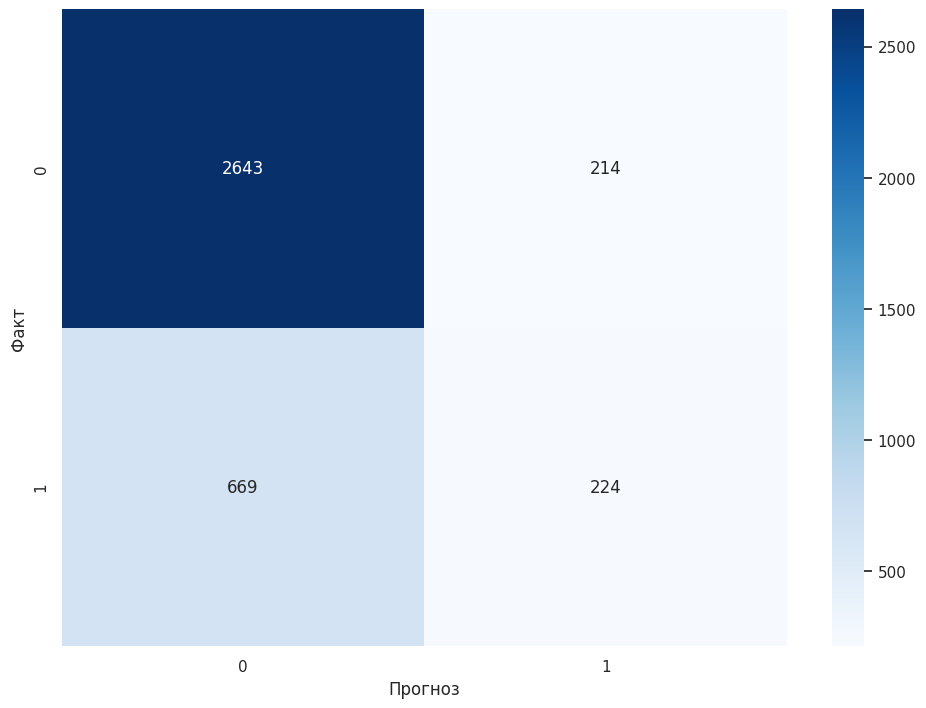

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')

**Борьба с дисбалансом классов**

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2857
           1       0.49      0.77      0.60       893

    accuracy                           0.75      3750
   macro avg       0.70      0.76      0.71      3750
weighted avg       0.81      0.75      0.77      3750



Text(112.49999999999999, 0.5, 'Факт')

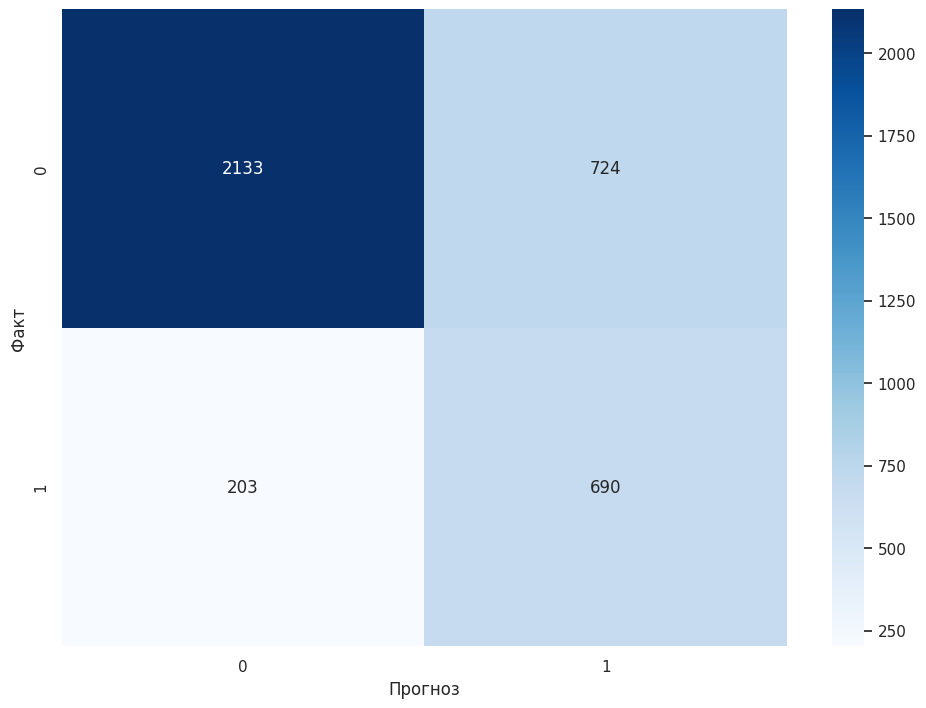

In [ ]:
lr_model = LogisticRegression(random_state=42, class_weight='balanced')

lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')

Простейший способ сокращения выборки мажоритарных классов - случайное удаление записей из этой категории.

Для этого будем использовать класс RandomUnderSampler из библиотеки imblearn.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


# Инициализируем RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Применяем downsampling
X_train_down, y_train_down = rus.fit_resample(X_train, y_train)

print(f'Размерность тренировочной выборки до сэмплирования: {X_train.shape}')
print(f'Баланс классов до сэмплирования:\n{y_train.value_counts()}')
print('-'*40)
print(f'Размерность тренировочной выборки после сэмплирования: {X_train_down.shape}')
print(f'Баланс классов после сэмплирования:\n{y_train_down.value_counts()}')

Размерность тренировочной выборки до сэмплирования: (11249, 7)
Баланс классов до сэмплирования:
left
0    8571
1    2678
Name: count, dtype: int64
----------------------------------------
Размерность тренировочной выборки после сэмплирования: (5356, 7)
Баланс классов после сэмплирования:
left
0    2678
1    2678
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2857
           1       0.49      0.77      0.60       893

    accuracy                           0.75      3750
   macro avg       0.70      0.76      0.71      3750
weighted avg       0.81      0.75      0.77      3750



Text(112.49999999999999, 0.5, 'Факт')

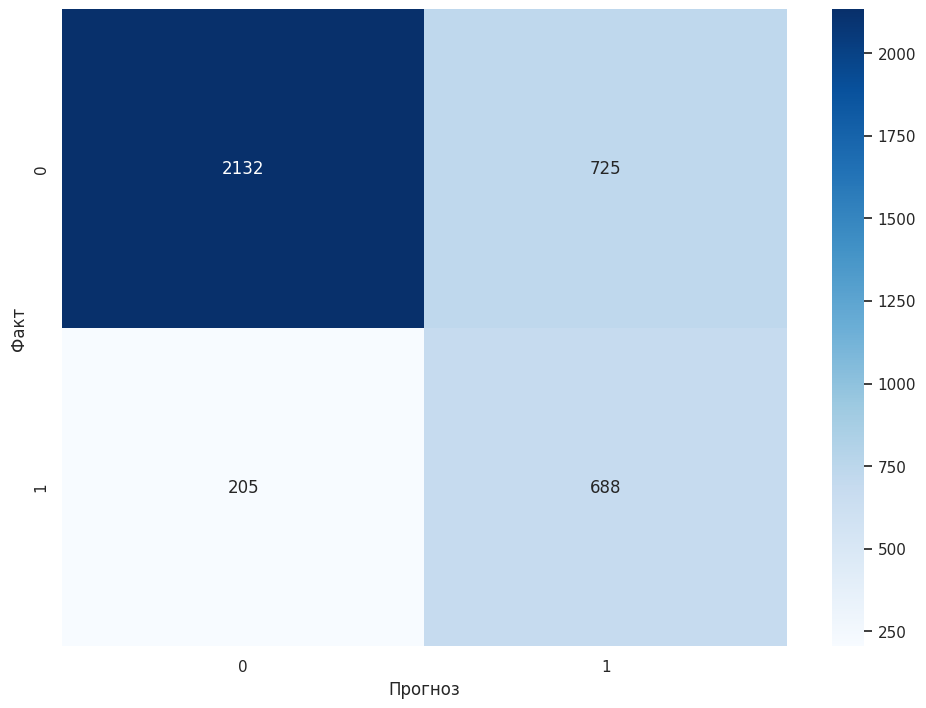

In [ ]:
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train_down, y_train_down)

lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')

**Upsampling**

Заключается в том, чтобы случайные образом скопировать объекты из миноритарного класса так, чтобы их по количество приравнять к мажоритарному классу.

Тут мы инициализируем `RandomOverSampler` и выполняем upsampling с помощью метода `fit_resample`. Этот метод возвращает новые массивы, в которых классы сбалансированы.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Инициализируем RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Выполняем upsampling
X_train_up, y_train_up = ros.fit_resample(X_train, y_train)

print(f'Размерность тренировочной выборки до сэмплирования: {X_train.shape}')
print(f'Баланс классов до сэмплирования:\n{y_train.value_counts()}')
print('-'*40)
print(f'Размерность тренировочной выборки после сэмплирования: {y_train_up.shape}')
print(f'Баланс классов после сэмплирования:\n{y_train_up.value_counts()}')

Размерность тренировочной выборки до сэмплирования: (11249, 7)
Баланс классов до сэмплирования:
left
0    8571
1    2678
Name: count, dtype: int64
----------------------------------------
Размерность тренировочной выборки после сэмплирования: (17142,)
Баланс классов после сэмплирования:
left
0    8571
1    8571
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2857
           1       0.49      0.77      0.60       893

    accuracy                           0.75      3750
   macro avg       0.70      0.76      0.71      3750
weighted avg       0.81      0.75      0.77      3750



Text(112.49999999999999, 0.5, 'Факт')

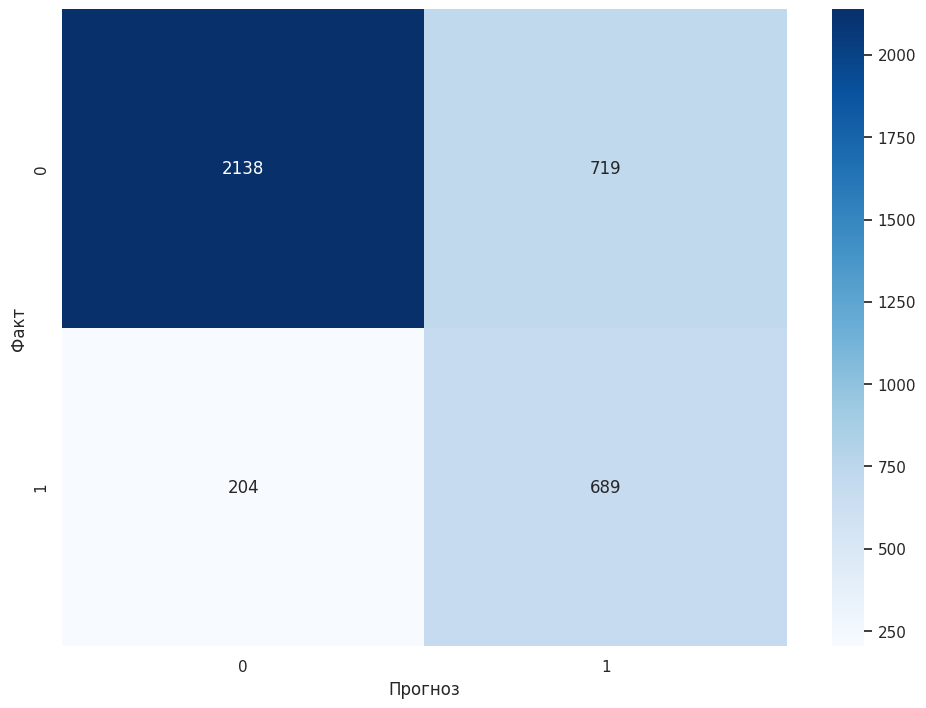

In [ ]:
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train_up, y_train_up)

lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')

Приведенные выше алгоритмы могут улучшать качество, но всё же для большинста случаев достаточно просты. Мы или просто выкидываем часть имеющихся данных или генерируем искуственные просто копированием исходных, что не очень надёжно.

Поэтому были созданы специальные алгоритмы генерации искусственных данных. Самый популярный из таких алгоритмов — алгоритм SMOTE (Synthetic Minority Oversampling Techniques).
Есть и другие, можете почитать [здесь](https://alexanderdyakonov.wordpress.com/2021/05/27/imbalance/) и [здесь](https://loginom.ru/blog/imbalance-class)

В основе алгоритма лежит идея генерации некоторого количества искусственных наблюдений, которые были бы «похожи» на наблюдения, имеющиеся в миноритарном классе, но при этом не дублировали их.



In [ ]:
from imblearn.over_sampling import SMOTE

Создадим объект класса SMOTE и вызовем у него метод fit_resample(), передав в него обучающую выборку (X_train, y_train). Затем выведем количество наблюдений каждого из классов до и после сэмплирования:

In [ ]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print(f'Размерность тренировочной выборки до сэмплирования: {X_train.shape}')
print(f'Баланс классов до сэмплирования:\n{y_train.value_counts()}')
print('-'*40)
print(f'Размерность тренировочной выборки после сэмплирования: {X_train_smote.shape}')
print(f'Баланс классов после сэмплирования:\n{y_train_smote.value_counts()}')

Размерность тренировочной выборки до сэмплирования: (11249, 7)
Баланс классов до сэмплирования:
left
0    8571
1    2678
Name: count, dtype: int64
----------------------------------------
Размерность тренировочной выборки после сэмплирования: (17142, 7)
Баланс классов после сэмплирования:
left
0    8571
1    8571
Name: count, dtype: int64


              precision    recall  f1-score   support

           0       0.91      0.75      0.82      2857
           1       0.49      0.77      0.60       893

    accuracy                           0.76      3750
   macro avg       0.70      0.76      0.71      3750
weighted avg       0.81      0.76      0.77      3750



Text(112.49999999999999, 0.5, 'Факт')

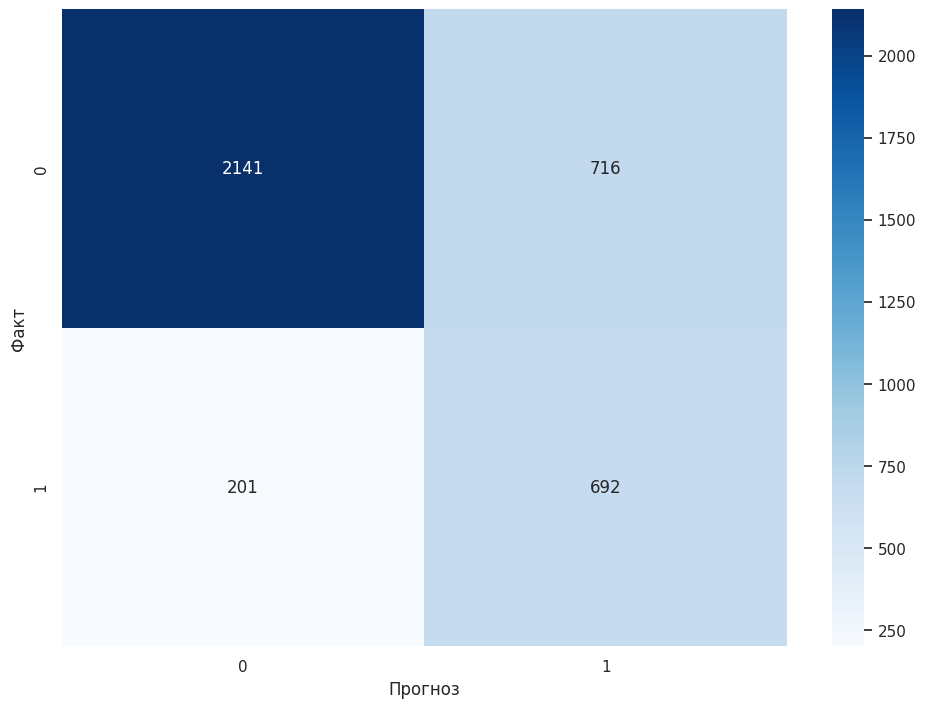

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_smote, y_train_smote)
lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))

cm = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')

Какой из методов сработает лучше, заранее сказать нельзя, нужно экспериментировать :)

### **Кластеризация пользователей**

In [ ]:
from sklearn.cluster import KMeans

Тут нам разделение на трейн и тест уже не нужно.

In [ ]:
X = df_ml.drop('left', axis = 1)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

Реализуем функцию get_inertia, которая будет принимать данные и количество кластеров и возвращать значение инерции:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

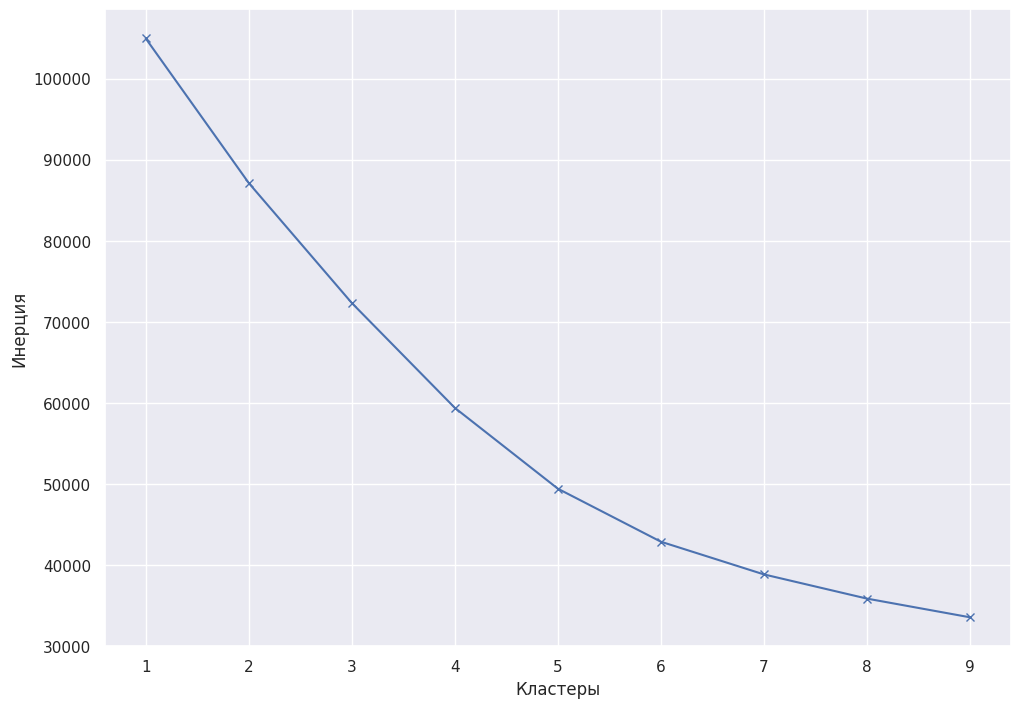

In [ ]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []
for cluster_num in range(1, 10):
    inertia.append(get_inertia(cluster_num, X_scaled))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Инерция", fontsize=12)
plt.plot([i for i in range(1, 10)], inertia, 'xb-')
plt.show()

**Коэффициент силуэта**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

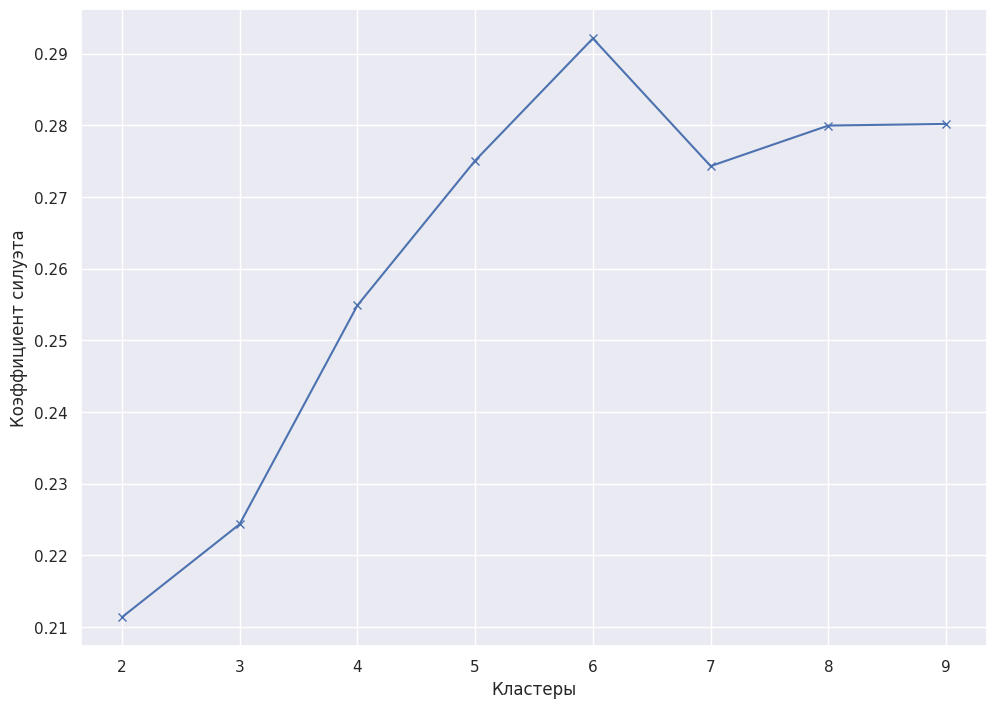

In [ ]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров

silhouette_scores = []

for cluster_num in range(2, 10):
    silhouette_scores.append(get_silhouette(cluster_num, X_scaled))

# визуализируем, как менялась инерция в зависимости от количества кластеров
plt.xlabel("Кластеры", fontsize=12)
plt.ylabel("Коэффициент силуэта", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette_scores, 'xb-')
plt.show()

**Проведение кластеризации**

In [ ]:
# задаём модель K-means с числом кластеров 3
km = KMeans(n_clusters=3, random_state=42)

In [ ]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Сохраняем метки кластера в столбец 'cluster' нашего исходного датасета - gym, и датасета с признаками - Х

In [ ]:
df_ml['cluster'] = labels
df_ml

<ipython-input-195-c29226e3a493>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['cluster'] = labels


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,cluster
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1
14995,0.37,0.48,2,160,3,0,1,0,1
14996,0.37,0.53,2,143,3,0,1,0,1
14997,0.11,0.96,6,280,4,0,1,0,0


**Оценка средних значений и распределений признаков по кластерам**

In [ ]:
df_ml.groupby('cluster').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
cluster,,,,,,,,
0,0.542661,0.834237,4.742760,237.587251,4.444904,0.120534,0.358970,0.0
1,0.651223,0.649340,3.270989,180.336787,2.937727,0.155095,0.175497,0.0
2,0.656019,0.706019,3.752351,199.849530,4.166144,0.238245,0.059561,1.0


Посмотрим на распределения бинарных признаков в разбивке по кластерам.

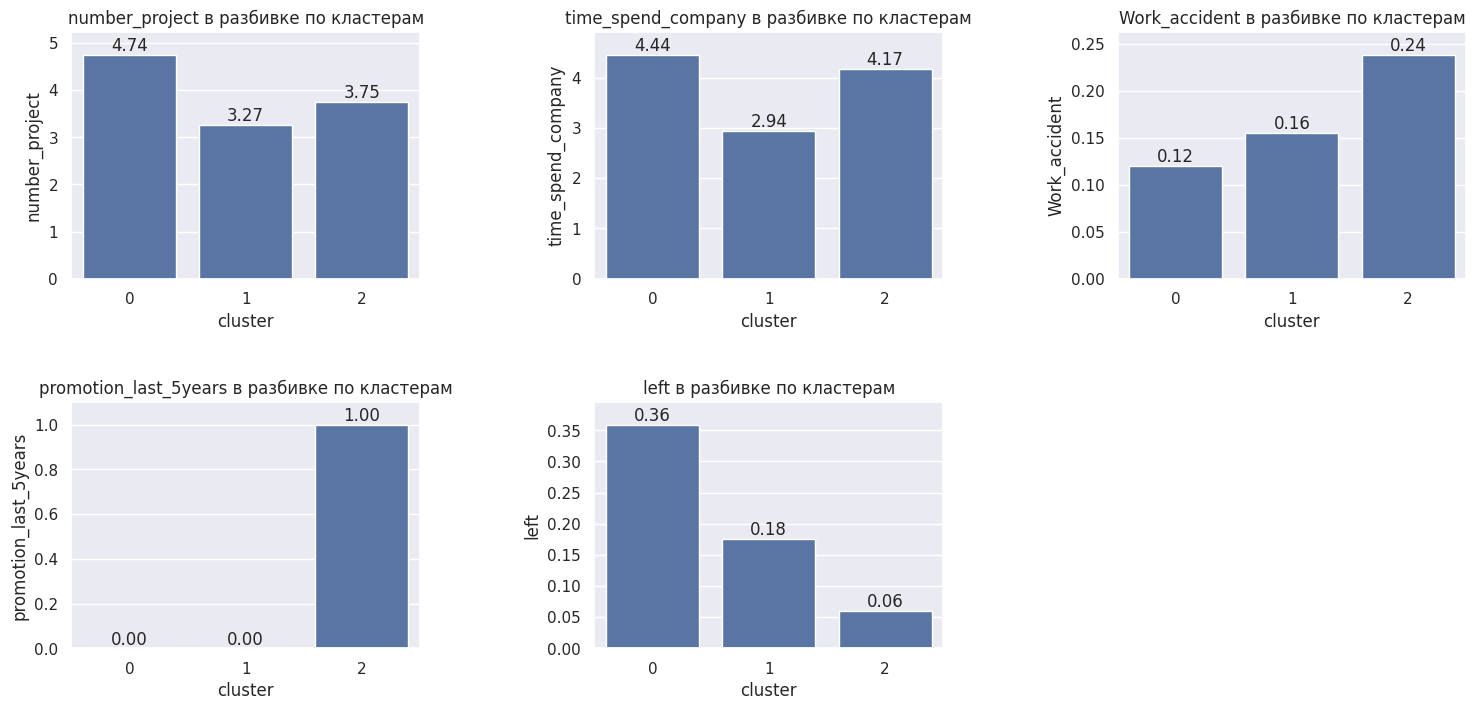

In [ ]:
num_plots = len(categorical_list + ['left'])
rows = math.ceil(num_plots / 3)  # Количество строк
cols = min(num_plots, 3)  # Количество столбцов

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_list + ['left']):
    ax = sns.barplot(data=df_ml, x='cluster', y=col, ax=axes[i], errorbar=None)
    ax.set_title(f'{col} в разбивке по кластерам')
    bar_labels = [f"{value:.2f}" for value in ax.containers[0].datavalues]
    ax.bar_label(ax.containers[0], labels=bar_labels)
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1] * 1.05)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

**Посмотрим на распределения непрерывных признаков в разбивке по кластерам.**

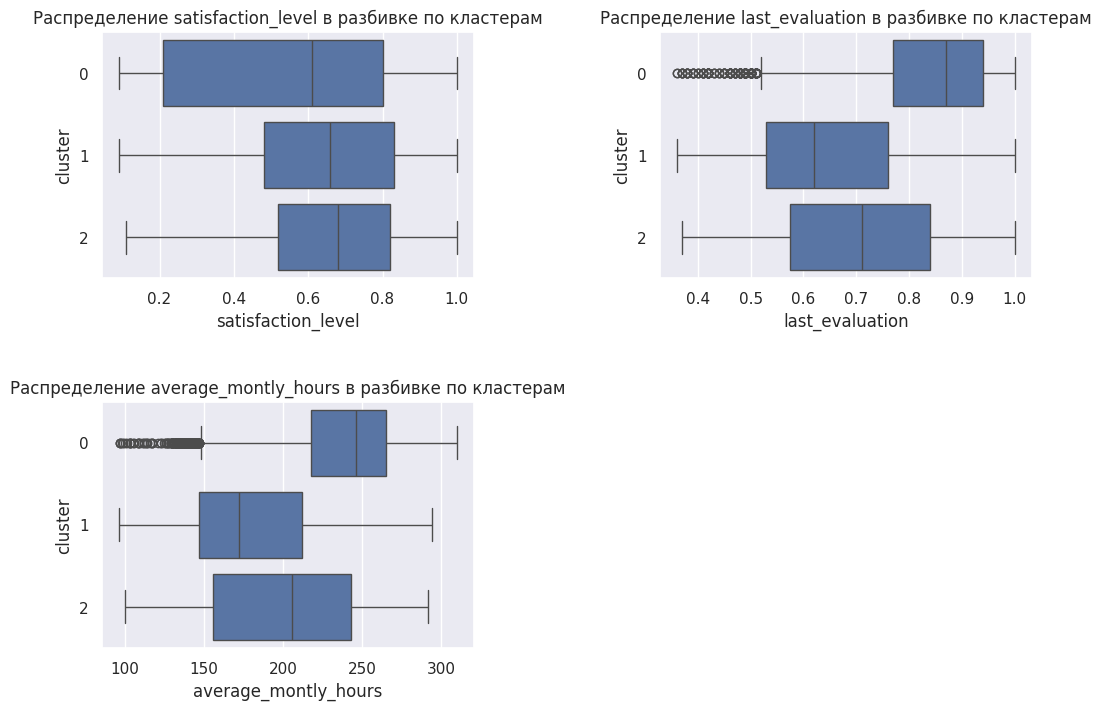

In [ ]:
num_plots = len(non_categorical_list)
rows = math.ceil(num_plots / 2)
cols = min(num_plots, 2)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(non_categorical_list):
    ax = sns.boxplot(data=df_ml, orient='h', x=col, y='cluster', ax=axes[i])
    ax.set_title(f'Распределение {col} в разбивке по кластерам')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

Вывод:    
-качество модели зависит от качества данных;    
-можно "выжать" и из текущих данных картинку, смотря какая стоит задача;   
-я как исполнитель покажу несколько вариантов с оценкой качества. Выбор за заказчиком.   
Моя рекомендация бизнес-заказчику улучшить данные (добавить новые признаки).
